In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv('RidingMowers.csv')

In [10]:
df=pd.get_dummies(df,drop_first=True)
df

,Income,Lot_Size,Response_Not Bought
0,34,26,True
1,34,40,True
2,34,46,True
3,34,48,True
4,34,53,True
...,...,...,...
175,86,121,False
176,87,109,False
177,88,119,False
178,89,110,False


In [11]:
X=df.drop('Response_Not Bought',axis=1)
y=df['Response_Not Bought']
print(X,y)

     Income  Lot_Size
0        34        26
1        34        40
2        34        46
3        34        48
4        34        53
..      ...       ...
175      86       121
176      87       109
177      88       119
178      89       110
179      89       124

[180 rows x 2 columns] 0       True
1       True
2       True
3       True
4       True
       ...  
175    False
176    False
177    False
178    False
179    False
Name: Response_Not Bought, Length: 180, dtype: bool


In [12]:
clf=IsolationForest(contamination=0.05,random_state=23)
clf.fit(X)

IsolationForest(contamination=0.05, random_state=23)

In [15]:
prediction=clf.predict(X)
prediction

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1, -1, -1])

In [18]:
print("range of outliers",str((prediction<0).mean()*100)+"%")
abn_ind=np.where(prediction<0)

range of outliers 5.0%


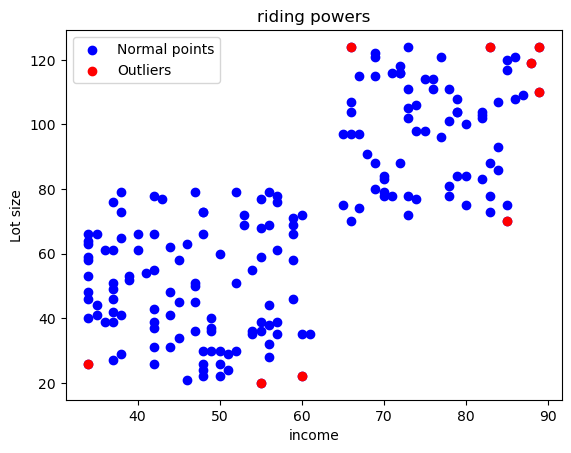

In [22]:
plt.scatter(X.Income,X.Lot_Size,c="blue",label="Normal points")
plt.scatter(X['Income'].loc[abn_ind],X['Lot_Size'].loc[abn_ind],c="red",label="Outliers")
plt.legend()
plt.title("riding powers")
plt.xlabel("income")
plt.ylabel("Lot size")
plt.show()